In [1]:
import os
from pathlib import Path
import numpy as np
import pickle
import matplotlib.animation as manimation
import matplotlib.patches as patches
import matplotlib.pyplot as plt


In [2]:
path = 'G:\\My Drive\\SHI\\2024' 
os.chdir(path)

In [3]:
from os import listdir
from os.path import isfile, join
files = [f for f in listdir(path) if isfile(join(path, f))]
files

['Motivation.gdoc',
 'Research Synergy.gdoc',
 'Sustainable Research Pathways Summer 2024 Project Plan - Faculty.gdoc',
 'Sustainable Research Pathways Summer 2024 Project Plan - Faculty.docx',
 'RW.pdf',
 '10.03-Gaussian-Process-Regression.ipynb',
 'DEBUG_NOTES.txt',
 'SHI 10th Anniversary story.txt',
 'SHI 10th Anniversary story.txt.bak',
 'tags.ipynb',
 'tags.db',
 'FY25 Computing Sciences Area LDRD Proposal Trebotich.docx',
 'FY25 Computing Sciences Area LDRD Proposal Trebotich (1).docx',
 '~$25 Computing Sciences Area LDRD Proposal Trebotich.docx',
 'FlowGCN_Trebotich.docx',
 'C.Paolini 2024 Offer Letter.pdf',
 'Fax Guidance for External Parties.pdf',
 'W8ben Form.pdf',
 'W9 Form.pdf',
 'crunchhdf5view.ipynb',
 'plot.nx512.step0004000.2d.hdf5',
 'patch_diagram.drawio.png',
 'mash.ipynb',
 'mesh.ipynb',
 'crunchhdf5view_copy.ipynb',
 'plot.nx128.step0000544.2d.hdf5',
 '2023 About Me Slide and Zoom background.pptx',
 '2024 About Me Paolini.gslides',
 'plot.nx128.step0000624.2d.hdf5'

In [4]:
objects = []
with (open("patches.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [5]:
a = objects[0]

In [6]:
print(a[0:200,0:4])

[[0.     0.     0.     0.    ]
 [0.     0.     0.     0.25  ]
 [0.     0.     0.25   0.    ]
 [0.     0.     0.25   0.25  ]
 [0.     0.     0.5    0.    ]
 [0.     0.     0.5    0.25  ]
 [0.     0.     0.75   0.    ]
 [0.     0.     0.75   0.25  ]
 [0.     1.     0.     0.    ]
 [0.     1.     0.     0.125 ]
 [0.     1.     0.     0.25  ]
 [0.     1.     0.     0.375 ]
 [0.     1.     0.125  0.    ]
 [0.     1.     0.125  0.125 ]
 [0.     1.     0.125  0.25  ]
 [0.     1.     0.125  0.375 ]
 [0.     1.     0.25   0.    ]
 [0.     1.     0.25   0.125 ]
 [0.     1.     0.25   0.25  ]
 [0.     1.     0.25   0.375 ]
 [0.     1.     0.375  0.    ]
 [0.     1.     0.375  0.125 ]
 [0.     1.     0.375  0.25  ]
 [0.     1.     0.375  0.375 ]
 [0.     1.     0.5    0.    ]
 [0.     1.     0.5    0.125 ]
 [0.     1.     0.5    0.25  ]
 [0.     1.     0.5    0.375 ]
 [0.     1.     0.625  0.    ]
 [0.     1.     0.625  0.125 ]
 [0.     1.     0.625  0.25  ]
 [0.     1.     0.625  0.375 ]
 [0.    

In [7]:
a.shape

(87080, 8)

In [8]:
filter = a[:,1] >= 0
A = a[filter]
A.shape

(87080, 8)

In [9]:
samples = 500
start=21770

In [10]:
X_train = A[start:start+samples,2:4]
X_train.shape

(500, 2)

In [11]:
y_train = np.array(A[start:start+samples,1], dtype=int)
y_train.shape

(500,)

In [12]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [13]:
kernel = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X_train, y_train)
kernel = 1.0 * RBF([1.0, 1.0])
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel).fit(X_train, y_train)

C:\Users\paoli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\paoli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\paoli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: 

In [14]:
# create a mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

In [15]:
print(f'{x_min}:{x_max},{y_min}:{y_max}')

-1.0:1.75,-1.0:1.4375


In [16]:
X_train[:, 0].min()

0.0

In [17]:
X_train[:, 0].max()

0.75

In [18]:
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

(16836, 3), 122, 138, 16836
Z: [[[0.33333333 0.33333333 0.33333333]
  [0.33333333 0.33333333 0.33333333]
  [0.33333333 0.33333333 0.33333333]
  ...
  [0.33333333 0.33333333 0.33333333]
  [0.33333333 0.33333333 0.33333333]
  [0.33333333 0.33333333 0.33333333]]

 [[0.33333333 0.33333333 0.33333333]
  [0.33333333 0.33333333 0.33333333]
  [0.33333333 0.33333333 0.33333333]
  ...
  [0.33333333 0.33333333 0.33333333]
  [0.33333333 0.33333333 0.33333333]
  [0.33333333 0.33333333 0.33333333]]

 [[0.33333333 0.33333333 0.33333333]
  [0.33333333 0.33333333 0.33333333]
  [0.33333333 0.33333333 0.33333333]
  ...
  [0.33333333 0.33333333 0.33333333]
  [0.33333333 0.33333333 0.33333333]
  [0.33333333 0.33333333 0.33333333]]

 ...

 [[0.33333333 0.33333333 0.33333333]
  [0.33333333 0.33333333 0.33333333]
  [0.33333333 0.33333333 0.33333333]
  ...
  [0.33333333 0.33333333 0.33333333]
  [0.33333333 0.33333333 0.33333333]
  [0.33333333 0.33333333 0.33333333]]

 [[0.33333333 0.33333333 0.33333333]
  [0.3

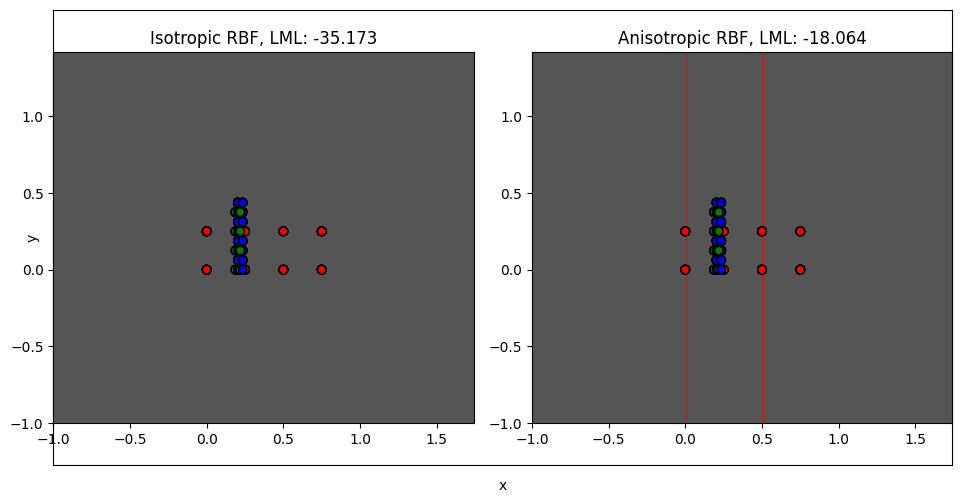

In [19]:
titles = ["Isotropic RBF", "Anisotropic RBF"]
plt.figure(figsize=(10, 5))
plt.xlabel("x",labelpad=10) 
plt.ylabel("y",labelpad=10)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 0.5)
plt.xticks(())
plt.yticks(())
plt.grid(visible=True)
for i, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    # Plot the predicted probabilities. For that, we will assign a color to
    # each point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(1, 2, i + 1)

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    print(f'{Z.shape}, {xx.shape[0]}, {xx.shape[1]}, {xx.shape[0] * xx.shape[1]}')
    # Put the result into a color plot
    Z = Z.reshape((xx.shape[0], xx.shape[1], 3))
    print(f'Z: {Z}')
    plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=np.array(["r", "g", "b"])[y_train], edgecolors=(0, 0, 0))
    #plt.xlabel("x")
    #plt.ylabel("y")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    #plt.xticks(())
    #plt.yticks(())
    #plt.xlim(x_min, x_max)
    #plt.ylim(y_min, y_max)
    plt.title(
        "%s, LML: %.3f" % (titles[i], clf.log_marginal_likelihood(clf.kernel_.theta))
    )

plt.tight_layout()
plt.show()

In [20]:
a.shape

(87080, 8)

In [21]:
a[87080//4,0]

259.0

In [22]:
87080//4

21770

In [23]:
a[:,0:9]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.50000000e-01, 2.19201789e-15, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.50000000e-01, 1.97339264e-15, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.50000000e-01, ...,
        2.50000000e-01, 1.23902252e-15, 0.00000000e+00],
       ...,
       [1.00000000e+03, 2.00000000e+00, 9.37500000e-01, ...,
        6.25000000e-02, 1.00761388e-05, 0.00000000e+00],
       [1.00000000e+03, 2.00000000e+00, 9.37500000e-01, ...,
        6.25000000e-02, 3.22107764e-06, 0.00000000e+00],
       [1.00000000e+03, 2.00000000e+00, 9.37500000e-01, ...,
        6.25000000e-02, 9.94278348e-07, 0.00000000e+00]])

24770: step 409.0: 0.421875, 0.125, 0.03125, 0.0625 2.0
24771: step 409.0: 0.421875, 0.1875, 0.03125, 0.0625 2.0
24772: step 409.0: 0.421875, 0.25, 0.03125, 0.0625 2.0
24773: step 409.0: 0.421875, 0.3125, 0.03125, 0.0625 2.0
24774: step 409.0: 0.421875, 0.375, 0.03125, 0.0625 2.0
24775: step 409.0: 0.421875, 0.4375, 0.03125, 0.0625 2.0
24776: step 410.0: 0.0, 0.0, 0.25, 0.25 0.0
24777: step 410.0: 0.0, 0.25, 0.25, 0.25 0.0
24778: step 410.0: 0.25, 0.0, 0.25, 0.25 0.0
24779: step 410.0: 0.25, 0.25, 0.25, 0.25 0.0
24780: step 410.0: 0.5, 0.0, 0.25, 0.25 0.0
24781: step 410.0: 0.5, 0.25, 0.25, 0.25 0.0
24782: step 410.0: 0.75, 0.0, 0.25, 0.25 0.0
24783: step 410.0: 0.75, 0.25, 0.25, 0.25 0.0
24784: step 410.0: 0.40625, 0.0, 0.09375, 0.125 1.0
24785: step 410.0: 0.40625, 0.125, 0.09375, 0.125 1.0
24786: step 410.0: 0.40625, 0.25, 0.09375, 0.125 1.0
24787: step 410.0: 0.40625, 0.375, 0.09375, 0.125 1.0
24788: step 410.0: 0.421875, 0.0, 0.03125, 0.0625 2.0
24789: step 410.0: 0.421875, 0.0625

OSError: [Errno 22] Invalid argument

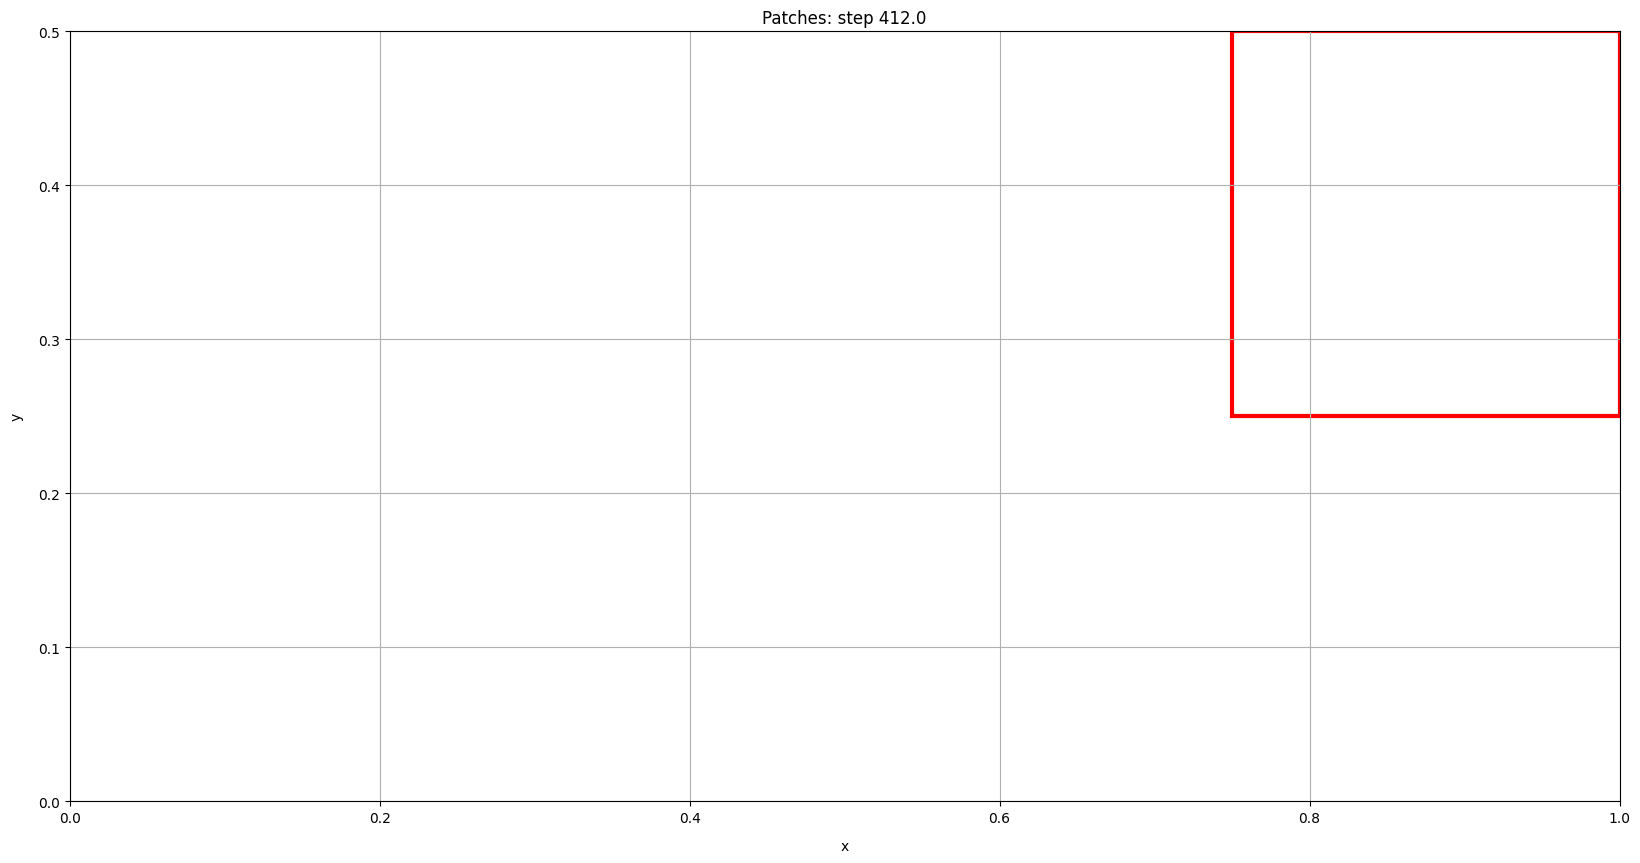

In [24]:
FFMpegWriter = manimation.writers["ffmpeg"]
metadata = dict(title="Patches", artist="Matplotlib", comment="AMR Testcase")
writer = FFMpegWriter(fps=10,metadata=metadata)
fig = plt.figure(figsize=(20,10))
colors = ["r", "b", "g", "y", "m", "c"]
ax = fig.add_subplot(111)
ax.set_title(f"Patches")
ax.set_xlabel("x",labelpad=10) 
ax.set_ylabel("y",labelpad=10)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 0.5)
plt.grid(visible=True)
#A = a[a[:,7].argsort()[:-1]]
A = a
frames=300
start=21770+3000
with writer.saving(fig, "writer_test.mp4", frames):
    #for i in range(a.shape[0]):
    for i in range(start,start+frames):
        ax.set_title(f"Patches: step {A[i,0]}")

        print(f'{i}: step {A[i,0]}: {A[i,2]}, {A[i,3]}, {A[i,4]}, {A[i,5]} {A[i,1]}')
        rect = patches.Rectangle((A[i,2], A[i,3]), A[i,4], A[i,5], linewidth=3, edgecolor=colors[int(A[i,1])], facecolor='none')
        ax.add_patch(rect)
        writer.grab_frame()
        rect.set_visible(False)
        
writer.finish()


In [25]:
#X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
#a[0:200,0:4]
X = np.unique(a[:,0]).reshape(-1, 1)
print(f'X: {X.shape}')
Y = np.empty((X.shape[0],2))
print(f'Y: {Y.shape}')


X: (1001, 1)
Y: (1001, 2)


In [26]:
stepMin = 113
stepMax = 500 #600
file = r"C:\Users\paoli\Downloads\origins.mp4"
path = Path(file)
if path.is_file():
    os.remove(file)
FFMpegWriter = manimation.writers["ffmpeg"]
metadata = dict(title="Patches", artist="Matplotlib", comment="AMR Testcase")
writer = FFMpegWriter(fps=10,metadata=metadata)
fig = plt.figure(figsize=(20,10))
colors = ["r", "b", "g", "y", "m", "c"]
ax = fig.add_subplot(111)
frames=stepMax-stepMin+1

#A = a[a[:,7].argsort()[:-1]]
with writer.saving(fig, file, frames):
    for step in range(X.shape[0]):
        if stepMin <= step <= stepMax:
            plt.xlabel("x",labelpad=10)
            plt.ylabel("y",labelpad=10)
            plt.title(f"Level 1 Origins: step {step}")
            plt.grid(True)
            plt.xlim(0.0, 1.0)
            plt.ylim(0.0, 0.5)
            plt.grid(visible=True)
            condition = (a[:,0] == step)
            A = a[condition,1:4]
            condition = (A[:,0] == 1) # only level 1 boxes
            A = A[condition,1:3]
            for origin in range(A.shape[0]):
                #print(f'{origin}: step {A[origin,0]}: {A[origin,1]}')
                plt.scatter(A[origin,0], A[origin,1], color = 'blue')
            writer.grab_frame()
            print(f'wrote step {step}')
            plt.clf()
        
writer.finish()

wrote step 113
wrote step 114
wrote step 115
wrote step 116
wrote step 117
wrote step 118
wrote step 119
wrote step 120
wrote step 121
wrote step 122
wrote step 123
wrote step 124
wrote step 125
wrote step 126
wrote step 127
wrote step 128
wrote step 129
wrote step 130
wrote step 131
wrote step 132
wrote step 133
wrote step 134
wrote step 135
wrote step 136
wrote step 137
wrote step 138
wrote step 139
wrote step 140
wrote step 141
wrote step 142
wrote step 143
wrote step 144
wrote step 145
wrote step 146
wrote step 147
wrote step 148
wrote step 149
wrote step 150
wrote step 151
wrote step 152
wrote step 153
wrote step 154
wrote step 155
wrote step 156
wrote step 157
wrote step 158
wrote step 159
wrote step 160
wrote step 161
wrote step 162
wrote step 163
wrote step 164
wrote step 165
wrote step 166
wrote step 167
wrote step 168
wrote step 169
wrote step 170
wrote step 171
wrote step 172
wrote step 173
wrote step 174
wrote step 175
wrote step 176
wrote step 177
wrote step 178
wrote step

<Figure size 2000x1000 with 0 Axes>

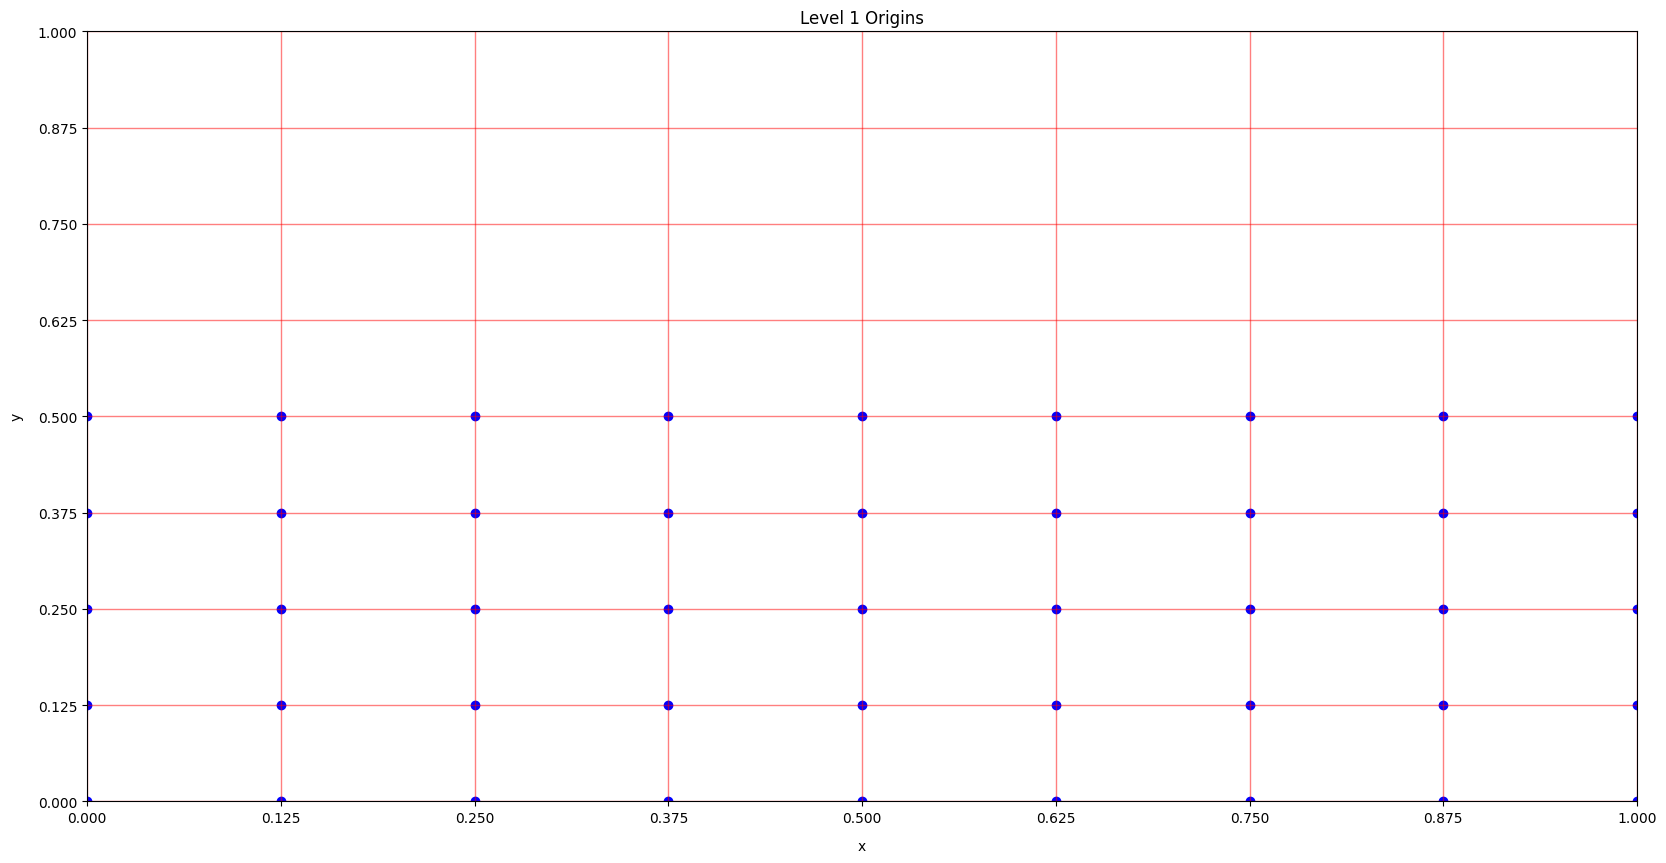

In [27]:
h = 0.125   # step size in the mesh
x_min = 0.0 
x_max = 1.0
y_min = 0.0 
y_max = 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max+h, h), np.arange(y_min, y_max+h, h))
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("x",labelpad=10)
plt.ylabel("y",labelpad=10)
plt.title(f"Level 1 Origins")
#plt.grid(True)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

colors = ["r", "b", "g", "y", "m", "c"]

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(x_min, x_max+h, h)
#minor_ticks = np.arange(0, 101, 5)

ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
#ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
#ax.grid(which='minor', alpha=h)
#ax.grid(which='major', alpha=h/2)

ax.grid(color='r', linestyle='-', linewidth=1, alpha=0.5)

plt.scatter(xx,yy, color = 'blue')
plt.show()


### Row-major

x_i 0, 0: step 113, origin (0.0, 0.0), 2D offset 0.0, 3D offset 113.0
x_i 1, 1: step 113, origin (0.0, 0.125), 2D offset 1.125, 3D offset 549.5
x_i 2, 2: step 113, origin (0.0, 0.25), 2D offset 2.25, 3D offset 986.0
x_i 3, 3: step 113, origin (0.0, 0.375), 2D offset 3.375, 3D offset 1422.5
x_i 4, 0: step 114, origin (0.0, 0.0), 2D offset 0.0, 3D offset 114.0
x_i 5, 1: step 114, origin (0.0, 0.125), 2D offset 1.125, 3D offset 550.5
x_i 6, 2: step 114, origin (0.0, 0.25), 2D offset 2.25, 3D offset 987.0
x_i 7, 3: step 114, origin (0.0, 0.375), 2D offset 3.375, 3D offset 1423.5
x_i 8, 0: step 115, origin (0.0, 0.0), 2D offset 0.0, 3D offset 115.0
x_i 9, 1: step 115, origin (0.0, 0.125), 2D offset 1.125, 3D offset 551.5
x_i 10, 2: step 115, origin (0.0, 0.25), 2D offset 2.25, 3D offset 988.0
x_i 11, 3: step 115, origin (0.0, 0.375), 2D offset 3.375, 3D offset 1424.5
x_i 12, 0: step 116, origin (0.0, 0.0), 2D offset 0.0, 3D offset 116.0
x_i 13, 1: step 116, origin (0.0, 0.125), 2D offset 1.

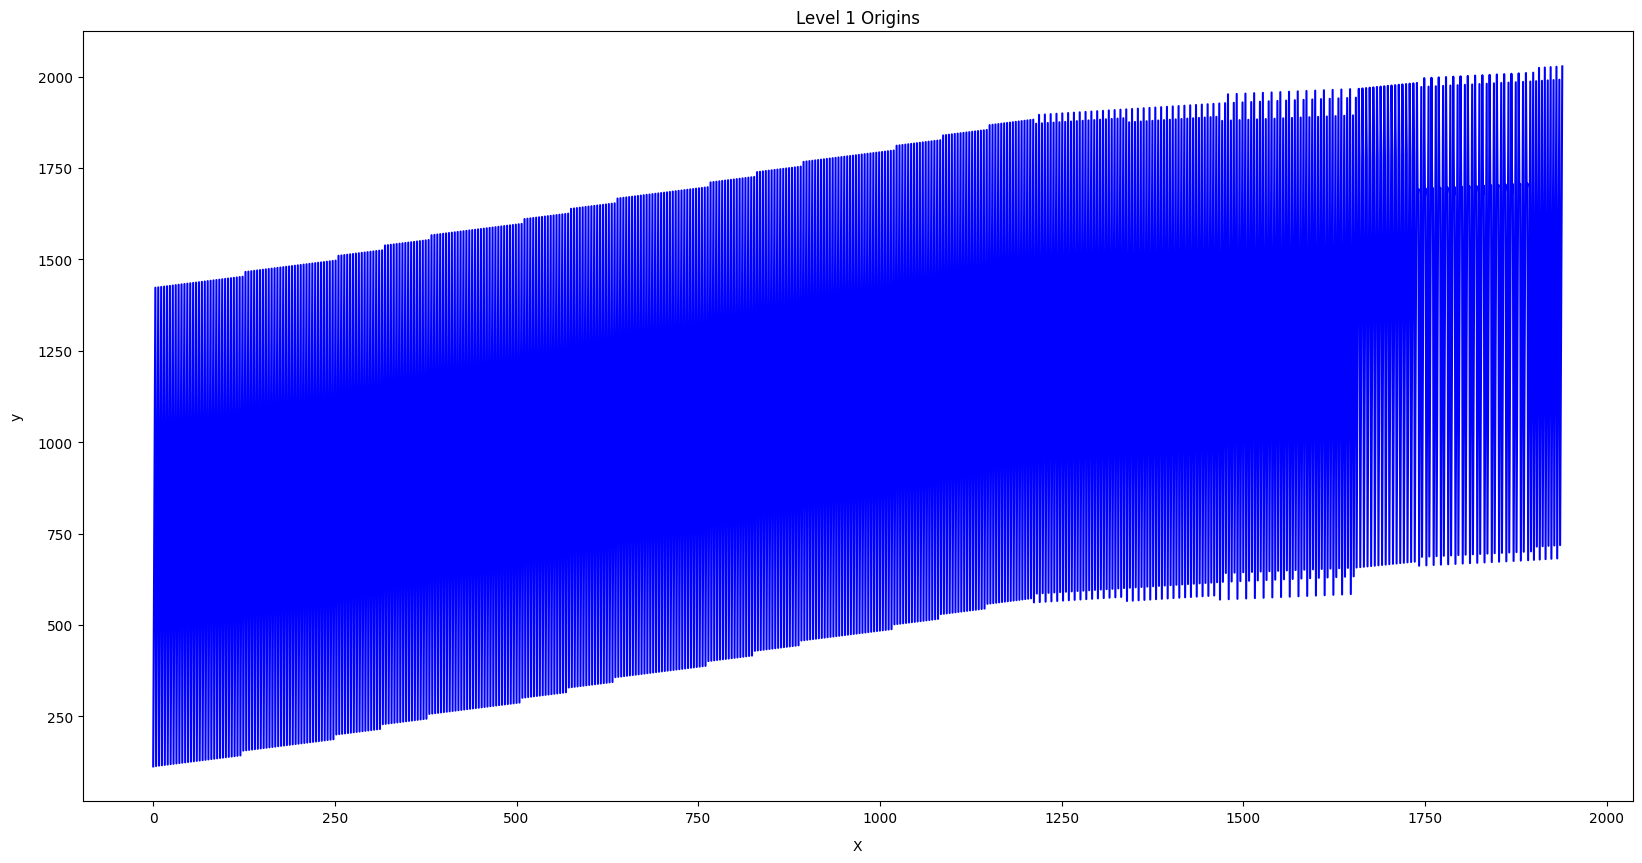

In [28]:
cols = np.arange(x_min,x_max+h,h)
N2 = len(cols) # NCOLS
N3 = stepMax - stepMin + 1
i = 0
XX = np.empty((0,0))
yy = np.empty((0))
for step in range(X.shape[0]):
    if stepMin <= step <= stepMax:
        condition = (a[:,0] == step)
        A = a[condition,1:4]
        condition = (A[:,0] == 1) # only level 1 boxes
        A = A[condition,1:3]
        for origin in range(A.shape[0]):
            #print(f'{origin}: step {step}, origin ({A[origin,0]}, {A[origin,1]}), 2D offset {A[origin,1] * NCOLS + A[origin,0]}')
            offset3 = step + N3 * (A[origin,0] + N2 * A[origin,1])
            print(f'x_i {i}, {origin}: step {step}, origin ({A[origin,0]}, {A[origin,1]}), 2D offset {A[origin,0] + N2 * A[origin,1]}, 3D offset {offset3}')
            XX = np.append(XX,i)
            yy = np.append(yy,offset3)
            i += 1
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("X",labelpad=10)
plt.ylabel("y",labelpad=10)
plt.title(f"Level 1 Origins")
#plt.grid(True)
#plt.xlim(x_min, x_max)
#plt.ylim(y_min, y_max)

colors = ["r", "b", "g", "y", "m", "c"]

# Major ticks every 20, minor ticks every 5
#major_ticks = np.arange(x_min, x_max+h, h)
#minor_ticks = np.arange(0, 101, 5)

#ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)
#ax.set_yticks(major_ticks)
#ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
#ax.grid(which='both')

# Or if you want different settings for the grids:
#ax.grid(which='minor', alpha=h)
#ax.grid(which='major', alpha=h/2)

#ax.grid(color='r', linestyle='-', linewidth=1, alpha=0.5)

plt.plot(XX,yy, color = 'blue')
plt.show()

### Col-major

In [29]:
cols = np.arange(x_min,x_max+h,h)
NROWS = len(np.arange(y_min,y_max+h,h))
N2 = len(cols) # NCOLS
N3 = stepMax - stepMin + 1
i = 0
XX = np.empty((0,0))
yy = np.empty((0))
for step in range(X.shape[0]):
    if stepMin <= step <= stepMax:
        condition = (a[:,0] == step)
        A = a[condition,1:4]
        condition = (A[:,0] == 1) # only level 1 boxes
        A = A[condition,1:3]
        for origin in range(A.shape[0]):
            #print(f'{origin}: step {step}, origin ({A[origin,0]}, {A[origin,1]}), 2D offset {A[origin,1] * NCOLS + A[origin,0]}')
            offset2 = A[origin,0] + NROWS * A[origin,1] # col-major

            print(f'x_i {i}, {origin}: step {step}, origin ({A[origin,0]}, {A[origin,1]}), 2D offset {offset2}')
            XX = np.append(XX,i)
            yy = np.append(yy,offset2)
            i += 1
'''
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("X",labelpad=10)
plt.ylabel("y",labelpad=10)
plt.title(f"Level 1 Origins")
colors = ["r", "b", "g", "y", "m", "c"]
plt.plot(XX,yy, color = 'blue')
plt.show()
'''

x_i 0, 0: step 113, origin (0.0, 0.0), 2D offset 0.0
x_i 1, 1: step 113, origin (0.0, 0.125), 2D offset 0.625
x_i 2, 2: step 113, origin (0.0, 0.25), 2D offset 1.25
x_i 3, 3: step 113, origin (0.0, 0.375), 2D offset 1.875
x_i 4, 0: step 114, origin (0.0, 0.0), 2D offset 0.0
x_i 5, 1: step 114, origin (0.0, 0.125), 2D offset 0.625
x_i 6, 2: step 114, origin (0.0, 0.25), 2D offset 1.25
x_i 7, 3: step 114, origin (0.0, 0.375), 2D offset 1.875
x_i 8, 0: step 115, origin (0.0, 0.0), 2D offset 0.0
x_i 9, 1: step 115, origin (0.0, 0.125), 2D offset 0.625
x_i 10, 2: step 115, origin (0.0, 0.25), 2D offset 1.25
x_i 11, 3: step 115, origin (0.0, 0.375), 2D offset 1.875
x_i 12, 0: step 116, origin (0.0, 0.0), 2D offset 0.0
x_i 13, 1: step 116, origin (0.0, 0.125), 2D offset 0.625
x_i 14, 2: step 116, origin (0.0, 0.25), 2D offset 1.25
x_i 15, 3: step 116, origin (0.0, 0.375), 2D offset 1.875
x_i 16, 0: step 117, origin (0.0, 0.0), 2D offset 0.0
x_i 17, 1: step 117, origin (0.0, 0.125), 2D offset 

'\nfig = plt.figure(figsize=(20,10))\nax = fig.add_subplot(1, 1, 1)\nplt.xlabel("X",labelpad=10)\nplt.ylabel("y",labelpad=10)\nplt.title(f"Level 1 Origins")\ncolors = ["r", "b", "g", "y", "m", "c"]\nplt.plot(XX,yy, color = \'blue\')\nplt.show()\n'

In [30]:
117 - 113 + 1

5

In [31]:
cols = np.arange(x_min,x_max+h,h)
len(cols)
print(cols)

[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


In [32]:
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

NameError: name 'y' is not defined

In [ ]:
stepMax-stepMin+1

488

In [132]:
h = 0.125   # step size in the mesh
x_min = 0.0 
x_max = 1.0
y_min = 0.0 
y_max = 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max+h, h), np.arange(y_min, y_max+h, h))

rows = xx.shape[0]
cols = xx.shape[1]
X = np.empty((rows * cols, 2))
print(X.shape)
y = np.zeros(rows * cols, dtype=int)


data = np.unique(a[:,0]).reshape(-1, 1)
print(f'data: {data.shape}')
#Y = np.empty((X.shape[0],2))
#print(f'Y: {Y.shape}')

stepMin = 113
stepMax = 113 # 500 #600
i = 0
for step in range(data.shape[0]):
    if stepMin <= step <= stepMax:
        condition = (a[:,0] == step)
        A = a[condition,1:4]
        condition = (A[:,0] == 1) # only level 1 boxes
        A = A[condition,1:3]
        for origin in range(A.shape[0]):
            #print(f'{origin}: step {step}, origin ({A[origin,0]}, {A[origin,1]}), 2D offset {A[origin,1] * NCOLS + A[origin,0]}')
            offset2 = int(A[origin,1]/h * cols + A[origin,0]/h)
            offset3 = int(step + N3 * (A[origin,0]/h + N2 * A[origin,1]/h))
            print(f'x_i {i}, {origin}: step {step}, origin ({A[origin,0]}, {A[origin,1]}), 2D offset {offset2}, 3D offset {offset3}')
            #XX = np.append(XX,i)
            #yy = np.append(yy,offset3)
            y[offset2] = 1
            i += 1

(45, 2)
data: (1001, 1)
x_i 0, 0: step 113, origin (0.0, 0.0), 2D offset 0, 3D offset 113
x_i 1, 1: step 113, origin (0.0, 0.125), 2D offset 9, 3D offset 3605
x_i 2, 2: step 113, origin (0.0, 0.25), 2D offset 18, 3D offset 7097
x_i 3, 3: step 113, origin (0.0, 0.375), 2D offset 27, 3D offset 10589


In [56]:
from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [154]:
kernel = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)
kernel = 1.0 * RBF([1.0, 1.0])
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

0
GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))
(45, 2)
x_i 4, 0: step 1000, origin (0.0, 0.0)
x_i 4, 1: step 1000, origin (0.0, 0.125)
x_i 4, 2: step 1000, origin (0.0, 0.25)
x_i 4, 3: step 1000, origin (0.0, 0.375)
1
GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=[1, 1]))
(45, 2)
x_i 4, 0: step 1000, origin (0.0, 0.0)
x_i 4, 1: step 1000, origin (0.0, 0.125)
x_i 4, 2: step 1000, origin (0.0, 0.25)
x_i 4, 3: step 1000, origin (0.0, 0.375)


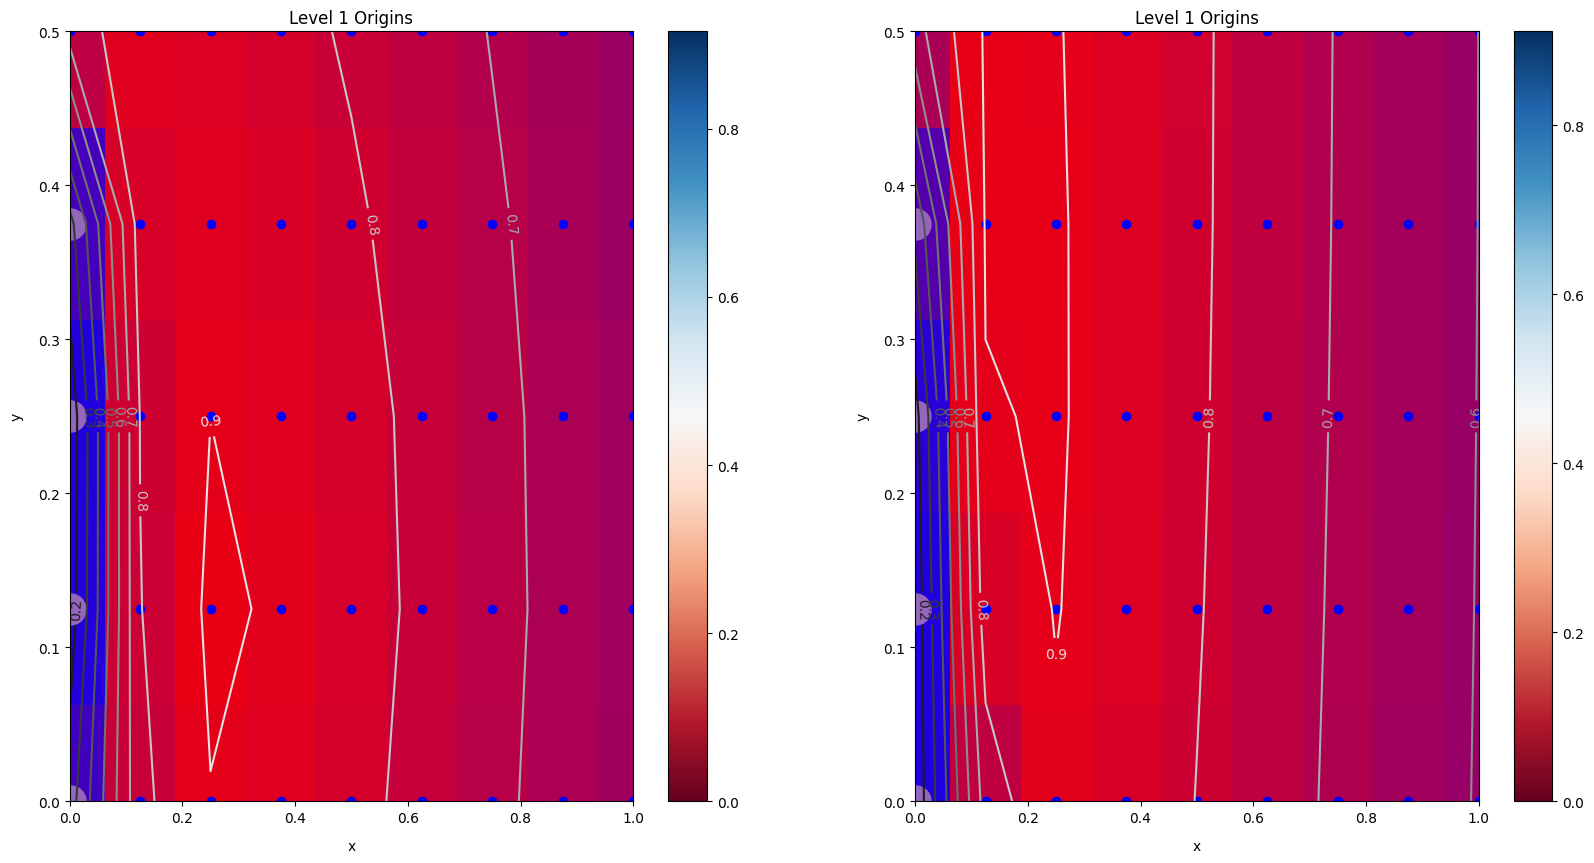

In [163]:
fig = plt.figure(figsize=(20,10))
'''
#ax = fig.add_subplot(1, 1, 1)
plt.xlabel("x",labelpad=10)
plt.ylabel("y",labelpad=10)
plt.title(f"Level 1 Origins")
#plt.grid(True)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

colors = ["r", "b", "g", "y", "m", "c"]

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(x_min, x_max+h, h)
#minor_ticks = np.arange(0, 101, 5)

ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
#ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
#ax.grid(which='minor', alpha=h)
#ax.grid(which='major', alpha=h/2)

ax.grid(color='r', linestyle='-', linewidth=1, alpha=0.5)

plt.scatter(xx,yy, color = 'blue')
#plt.show()
'''
for k, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    print(k)
    print(clf)
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    #print(Z)
    print(Z.shape)
    Z = Z.reshape((xx.shape[0], xx.shape[1], 2))


    #print(f'xx: {xx.shape}')
    #print(f'yy: {yy.shape}')
    #print(f'Z: {Z.shape}')

    pad = np.zeros((xx.shape[0], xx.shape[1], 1))
    #print(f'pad: {pad.shape}')

    #ZZ = np.append(Z,pad,axis=2)
    ZZ = np.dstack((Z,pad))
    ZZ[:,:,[2,1]] =  ZZ[:,:,[1,2]]



    #print(f'ZZ: {ZZ.shape}')
    


    plt.subplot(1, 2, k + 1)
    plt.xlabel("x",labelpad=10)
    plt.ylabel("y",labelpad=10)
    plt.title(f"Level 1 Origins")
    #plt.grid(True)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    major_ticks = np.arange(x_min, x_max+h, h)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.grid(which='both')
    


    # pcolormesh needs the pixel edges for x and y
    # and with default flat shading, Z needs to be evaluated at the pixel center
    plot = plt.pcolormesh(xx, yy, ZZ, cmap='RdBu', shading='nearest')
    plt.scatter(xx,yy, color = 'blue')
    ax.grid(color='b', linestyle='-', linewidth=2, alpha=0.9)
    for origin in range(A.shape[0]):
        print(f'x_i {i}, {origin}: step {step}, origin ({A[origin,0]}, {A[origin,1]})')
        plt.scatter(A[origin,0], A[origin,1], c="g", marker='o', s=500)
    # contour needs the centers
    cset = plt.contour(xx, yy, Z[:,:,0], cmap='gray')
    plt.clabel(cset, inline=True)

    plt.colorbar(plot)

plt.show()


In [162]:
print(ZZ)

[[[0.12192509 0.         0.87807491]
  [0.74502059 0.         0.25497941]
  [0.89010485 0.         0.10989515]
  [0.85415195 0.         0.14584805]
  [0.79814406 0.         0.20185594]
  [0.73965703 0.         0.26034297]
  [0.68492578 0.         0.31507422]
  [0.63647312 0.         0.36352688]
  [0.59556549 0.         0.40443451]]

 [[0.12725804 0.         0.87274196]
  [0.85207885 0.         0.14792115]
  [0.9030295  0.         0.0969705 ]
  [0.86327154 0.         0.13672846]
  [0.80593387 0.         0.19406613]
  [0.74567788 0.         0.25432212]
  [0.68917076 0.         0.31082924]
  [0.63924886 0.         0.36075114]
  [0.59725715 0.         0.40274285]]

 [[0.16188954 0.         0.83811046]
  [0.89466649 0.         0.10533351]
  [0.90712793 0.         0.09287207]
  [0.86786594 0.         0.13213406]
  [0.81101874 0.         0.18898126]
  [0.75005899 0.         0.24994101]
  [0.69238877 0.         0.30761123]
  [0.64136028 0.         0.35863972]
  [0.59851542 0.         0.4014845